## AI Machine Learning - Classificação

### Resolução TP2
----

### QUESTÕES TEÓRICAS

## Resolução das Questões Teóricas

**1. O que significa margem máxima em um SVM?**  
A margem máxima é a maior distância possível entre o hiperplano de separação e os vetores de suporte (os pontos mais próximos do hiperplano). Maximizar a margem ajuda a aumentar a capacidade de generalização do modelo, tornando-o mais robusto a novos dados.

**2. Explique o papel do parâmetro C em um SVM.**  
O parâmetro C controla o trade-off entre maximizar a margem e minimizar os erros de classificação no conjunto de treino. Um C muito alto penaliza mais os erros (menos tolerante a erros → margem menor, maior risco de overfitting). Um C baixo permite mais violações da margem (mais tolerante a erros → margem maior, menor risco de overfitting).

**3. O que é o kernel trick e por que ele é útil?**  
O kernel trick permite que o SVM realize classificações não lineares ao calcular produtos internos em um espaço transformado de maior dimensão, sem precisar calcular explicitamente essa transformação. É útil porque permite encontrar fronteiras de decisão mais complexas sem aumentar o custo computacional explicitamente.

**4. Compare os kernels linear, polinomial e RBF.**  
O kernel linear traça uma linha reta para separar as classes e funciona bem quando os dados são linearmente separáveis. O kernel polinomial cria fronteiras de decisão polinomiais (curvas), capturando interações não lineares entre as features. O kernel RBF cria fronteiras altamente flexíveis baseadas na distância entre os pontos, sendo ideal para separações complexas e não lineares.

### QUESTÕES PRÁTICAS

In [1]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

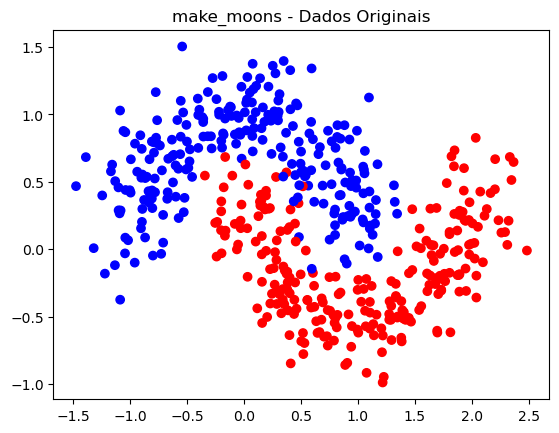

In [2]:
# Exercício 5 - Gerar make_moons, dividir treino/teste e visualizarrom sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
plt.title('make_moons - Dados Originais')
plt.show()

In [3]:
# Exercício 6 - SVM linear
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_linear = SVC(kernel='linear', C=1.0)
clf_linear.fit(X_train_scaled, y_train)
y_pred_linear = clf_linear.predict(X_test_scaled)

print('Acurácia (kernel linear):', accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Acurácia (kernel linear): 0.8533333333333334
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [4]:
# Exercício 7 - SVM polinomial grau 2 e 3
clf_poly2 = SVC(kernel='poly', degree=2, C=1.0)
clf_poly2.fit(X_train_scaled, y_train)
y_pred_poly2 = clf_poly2.predict(X_test_scaled)

clf_poly3 = SVC(kernel='poly', degree=3, C=1.0)
clf_poly3.fit(X_train_scaled, y_train)
y_pred_poly3 = clf_poly3.predict(X_test_scaled)

print('Acurácia (kernel poly deg=2):', accuracy_score(y_test, y_pred_poly2))
print('Acurácia (kernel poly deg=3):', accuracy_score(y_test, y_pred_poly3))

Acurácia (kernel poly deg=2): 0.52
Acurácia (kernel poly deg=3): 0.8533333333333334


In [5]:
# Exercício 8 - SVM RBF com diferentes gammas
for gamma_val in [0.01, 0.1, 1, 10]:
    clf_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma_val)
    clf_rbf.fit(X_train_scaled, y_train)
    y_pred_rbf = clf_rbf.predict(X_test_scaled)
    print(f"Acurácia (RBF gamma={gamma_val}): {accuracy_score(y_test, y_pred_rbf):.3f}")

Acurácia (RBF gamma=0.01): 0.860
Acurácia (RBF gamma=0.1): 0.860
Acurácia (RBF gamma=1): 0.987
Acurácia (RBF gamma=10): 0.967



Matriz de Confusão - linear


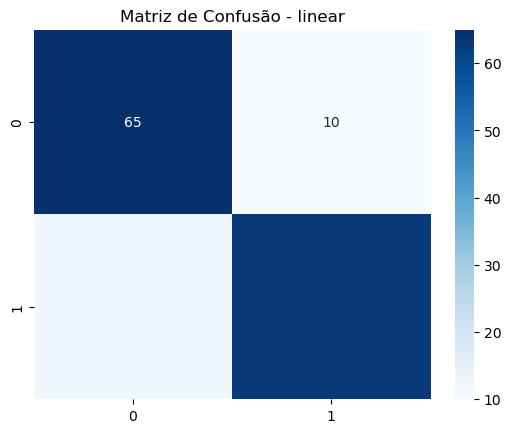


Matriz de Confusão - poly2


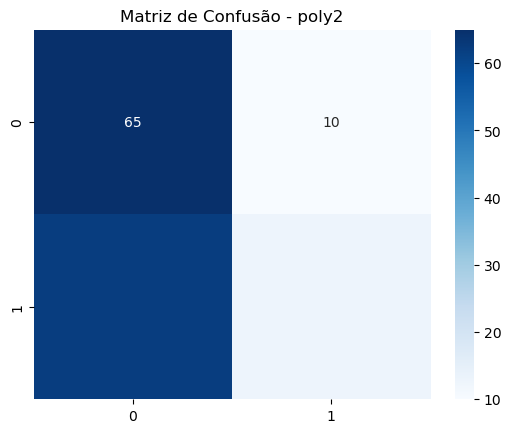


Matriz de Confusão - poly3


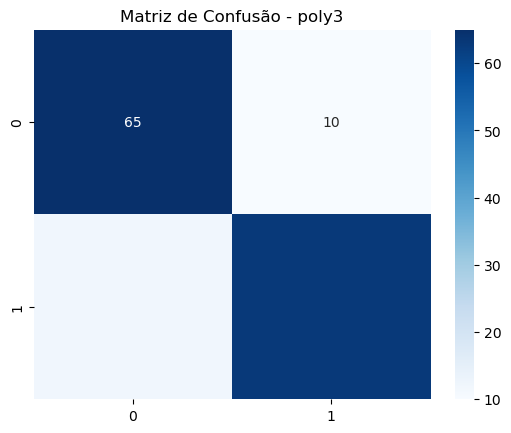


Matriz de Confusão - rbf (gamma=1)


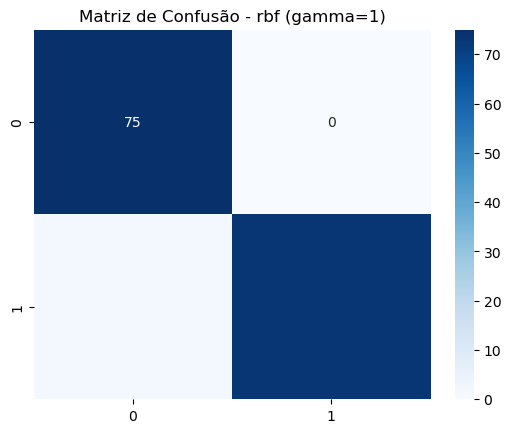

In [6]:
# Exercício 9 - Comparação entre kernels
modelos = {'linear': clf_linear, 'poly2': clf_poly2, 'poly3': clf_poly3, 'rbf (gamma=1)': SVC(kernel='rbf', C=1.0, gamma=1).fit(X_train_scaled, y_train)}

for nome, modelo in modelos.items():
    y_pred = modelo.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\nMatriz de Confusão - {nome}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

In [7]:
# Exercício 10 - Grid Search para melhor C e gamma no RBF
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print('Melhores parâmetros:', grid.best_params_)

Melhores parâmetros: {'C': 1, 'gamma': 10}


In [8]:
# Exercício 11 - Avaliar SVM com melhores parâmetros
best_rbf = grid.best_estimator_
y_pred_best = best_rbf.predict(X_test_scaled)
print('Acurácia (SVM RBF otimizado):', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Acurácia (SVM RBF otimizado): 0.9666666666666667
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.97      0.96      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [9]:
# Exercício 12 - Comparar com árvore, KNN, reg. logística
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print('Acurácia Árvore:', accuracy_score(y_test, y_pred_tree))
print('Acurácia KNN:', accuracy_score(y_test, y_pred_knn))
print('Acurácia LogReg:', accuracy_score(y_test, y_pred_logreg))
print('Acurácia SVM otimizado:', accuracy_score(y_test, y_pred_best))

Acurácia Árvore: 0.9666666666666667
Acurácia KNN: 0.9733333333333334
Acurácia LogReg: 0.8533333333333334
Acurácia SVM otimizado: 0.9666666666666667
